> **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

> **Loading each Dataset**

In [2]:
# Load each dataset
analyte_data = pd.read_csv('../Datasets/biospecimen.project-tcga-brca.2024-03-24/analyte.tsv', sep='\t')
aliquot_data = pd.read_csv('../Datasets/biospecimen.project-tcga-brca.2024-03-24/aliquot.tsv', sep='\t')
portion_data = pd.read_csv('../Datasets/biospecimen.project-tcga-brca.2024-03-24/portion.tsv', sep='\t')
sample_data = pd.read_csv('../Datasets/biospecimen.project-tcga-brca.2024-03-24/sample.tsv', sep='\t')
slide_data = pd.read_csv('../Datasets/biospecimen.project-tcga-brca.2024-03-24/slide.tsv', sep='\t')
clinical_data = pd.read_csv('../Datasets/clinical.project-tcga-brca.2024-03-24/clinical.tsv', sep='\t')
family_history_data = pd.read_csv('../Datasets/clinical.project-tcga-brca.2024-03-24/family_history.tsv', sep='\t')
exposure_data = pd.read_csv('../Datasets/clinical.project-tcga-brca.2024-03-24/exposure.tsv', sep='\t')
follow_up_data = pd.read_csv('../Datasets/clinical.project-tcga-brca.2024-03-24/follow_up.tsv', sep='\t')
pathology_data = pd.read_csv('../Datasets/clinical.project-tcga-brca.2024-03-24/pathology_detail.tsv', sep='\t')

print(clinical_data.head())
print(analyte_data.head())
print(aliquot_data.head())
print(sample_data.head())
print(portion_data.head())
print(slide_data.head())
print(pathology_data.head())
print(family_history_data.head())

# Example output for clinical data
print(clinical_data.info())
print(clinical_data.isnull().sum())


                                case_id case_submitter_id project_id  \
0  001cef41-ff86-4d3f-a140-a647ac4b10a1      TCGA-E2-A1IU  TCGA-BRCA   
1  001cef41-ff86-4d3f-a140-a647ac4b10a1      TCGA-E2-A1IU  TCGA-BRCA   
2  0045349c-69d9-4306-a403-c9c1fa836644      TCGA-A1-A0SB  TCGA-BRCA   
3  0045349c-69d9-4306-a403-c9c1fa836644      TCGA-A1-A0SB  TCGA-BRCA   
4  00807dae-9f4a-4fd1-aac2-82eb11bf2afb      TCGA-A2-A04W  TCGA-BRCA   

  age_at_index age_is_obfuscated cause_of_death cause_of_death_source  \
0           60               '--            '--                   '--   
1           60               '--            '--                   '--   
2           70               '--            '--                   '--   
3           70               '--            '--                   '--   
4           50               '--            '--                   '--   

  country_of_residence_at_enrollment days_to_birth days_to_death  ...  \
0                                '--        -22279     

> **Merging the Data**

In [3]:
# Merging clinical data with sample data
merged_data = pd.merge(clinical_data, sample_data, on='case_submitter_id', how='left')
merged_data = pd.merge(merged_data, portion_data, on='sample_id', how='left')
merged_data = pd.merge(merged_data, analyte_data, on='portion_submitter_id', how='left',suffixes=('_clin', '_samp'))
merged_data = pd.merge(merged_data, aliquot_data, on='sample_submitter_id', how='left',suffixes=('_clin', '_samp'))
merged_data = pd.merge(merged_data, slide_data, on='sample_submitter_id', how='left',suffixes=('_fromClin', '_fromSamp'))
# merged_data = pd.merge(merged_data, family_history_data, on='case_id', how='left') = no data in file
merged_data = pd.merge(merged_data, exposure_data, on='case_submitter_id', how='left')
# merged_data = pd.merge(merged_data, follow_up_data, on='case_id', how='left') = no data in file
# merged_data = pd.merge(merged_data, pathology_data, on='case_id', how='left') = no data in file


# Check results
print(merged_data.head())
print(merged_data.info())

                              case_id_x case_submitter_id_x project_id_x  \
0  001cef41-ff86-4d3f-a140-a647ac4b10a1        TCGA-E2-A1IU    TCGA-BRCA   
1  001cef41-ff86-4d3f-a140-a647ac4b10a1        TCGA-E2-A1IU    TCGA-BRCA   
2  001cef41-ff86-4d3f-a140-a647ac4b10a1        TCGA-E2-A1IU    TCGA-BRCA   
3  001cef41-ff86-4d3f-a140-a647ac4b10a1        TCGA-E2-A1IU    TCGA-BRCA   
4  001cef41-ff86-4d3f-a140-a647ac4b10a1        TCGA-E2-A1IU    TCGA-BRCA   

  age_at_index age_is_obfuscated cause_of_death cause_of_death_source  \
0           60               '--            '--                   '--   
1           60               '--            '--                   '--   
2           60               '--            '--                   '--   
3           60               '--            '--                   '--   
4           60               '--            '--                   '--   

  country_of_residence_at_enrollment days_to_birth days_to_death  ...  \
0                              

> Saving the Merged Data to a CSV file.

In [4]:
# Save the DataFrame to a CSV file
merged_data.to_csv('../Results/merged_data.csv', index=False)

merged_data_sample = merged_data.sample(frac=0.10, random_state=42)

merged_data_sample.to_csv('../Results/merged_data_sample.csv', index=False)

> **Data Cleaning & Preprocessing**

> There are some columns in the merged data which has a single value, i.e., `'--`. Hence we are removing them.

In [5]:
# Find columns with unique values containing only `'--`
columns_with_dash_quote = [col for col in merged_data.columns if merged_data[col].nunique() == 1 and merged_data[col].unique()[0] == "'--"]

# Drop those columns from the data
cleaned_data = merged_data.drop(columns=columns_with_dash_quote)

# Return the count of dropped columns and the new shape of the data
len(columns_with_dash_quote), cleaned_data.shape

(143, (159544, 176))

> There are some columns in the merged data which only has two kinds of values, i.e., `'--` or 'not reported', which again are not useful to our code. Hence we are removing them.

In [6]:
# Find columns with unique values containing '--' and 'not reported' (case-insensitive), including specific case `'--`
columns_with_dash_and_not_reported = [
    col for col in cleaned_data.columns
    if all(isinstance(value, str) and (value == "'--" or 'not reported' in value.lower()) for value in cleaned_data[col].unique())
]

# Drop those columns from the data
cleaned_data = cleaned_data.drop(columns=columns_with_dash_and_not_reported)

# Return the count of dropped columns and the new shape of the data
len(columns_with_dash_and_not_reported), cleaned_data.shape

(5, (159544, 171))

> Again, we went through the dataset, and found that most of these columns just had values as 'null' and `'--`, or 'null' and 'not reported'. These columns are being removed manually.

In [7]:
cleaned_data = cleaned_data.drop(['age_at_onset', 'alcohol_days_per_week', 'alcohol_drinks_per_day', 'alcohol_history', 'alcohol_intensity', 'alcohol_type', 'asbestos_exposure', 'bmi', 'cigarettes_per_day', 'coal_dust_exposure', 'environmental_tobacco_smoke_exposure', 
                                'exposure_duration', 'exposure_duration_years', 'exposure_type', 'height', 'marijuana_use_per_week', 'pack_years_smoked', 'parent_with_radiation_exposure', 'radon_exposure', 'respirable_crystalline_silica_exposure', 'secondhand_smoke_as_child', 
                                'smokeless_tobacco_quit_age', 'smoking_frequency', 'time_between_waking_and_first_smoke', 'tobacco_smoking_onset_year', 'tobacco_smoking_quit_year', 'tobacco_smoking_status', 'tobacco_use_per_day', 'type_of_smoke_exposure', 'type_of_tobacco_used', 'weight_y', 
                                 'years_smoked', 'tissue_microarray_coordinates', 'project_id', 'state', 'prostatic_involvement_percent', 'prostatic_chips_total_count', 'prostatic_chips_positive_count', 'percent_sarcomatoid_features', 'percent_rhabdoid_features', 'percent_inflam_infiltration', 
                                 'percent_granulocyte_infiltration', 'percent_follicular_component', 'percent_eosinophil_infiltration', 'number_proliferating_cells', 'bone_marrow_malignant_cells', 'project_id_fromSamp', 'state_samp', 'source_center', 'selected_normal_wxs', 'selected_normal_wgs', 
                                 'selected_normal_targeted_sequencing', 'selected_normal_low_pass_wgs', 'no_matched_normal_wxs', 'no_matched_normal_wgs', 'no_matched_normal_targeted_sequencing', 'no_matched_normal_low_pass_wgs', 'analyte_type_id_samp', 'analyte_type_samp', 'amount_samp', 'well_number',
                                 'state_clin', 'normal_tumor_genotype_snp_match', 'analyte_volume', 'analyte_quantity', 'amount_clin', 'state_y', 'state_x', 'project_id_x', 'days_to_diagnosis', 'project_id_y', 'project_id_clin', 'project_id_samp', 'project_id_fromClin', 'synchronous_malignancy', 
                                  'days_to_sample_procurement'], axis=1)

cleaned_data.shape

(159544, 95)

> At this stage, there are a lot of identifiers added in the merged code from all the different files, this does not give us any valuable information, and a lot of columns either just have a single type of data or multiple columns have similar data represented in different manner. All this does not add any value to our model, hence we are removing all of these columns manually after looking at the merged dataset.

In [8]:
cleaned_data = cleaned_data.drop(['case_id_x', 'case_id_y', 'case_submitter_id_x', 'case_id', 'case_submitter_id', 'case_id_samp', 'case_id_clin', 'case_submitter_id_clin', 'case_id_fromSamp', 'case_submitter_id_clin', 'case_id_fromClin', 'sample_id_clin', 'sample_submitter_id_x', 'sample_id_samp', 
                                  'sample_submitter_id', 'sample_id_fromSamp', 'portion_id_clin', 'portion_id_samp', 'portion_id_fromSamp', 'portion_submitter_id_clin', 'portion_submitter_id_samp', 'portion_submitter_id', 'portion_id_fromClin', 'aliquot_id', 'aliquot_submitter_id', 'slide_id', 
                                  'slide_submitter_id', 'pathology_report_uuid', 'creation_datetime', 'sample_type_id', 'case_submitter_id_y', 'sample_submitter_id_y', 'analyte_id_clin', 'analyte_submitter_id_clin', 'analyte_type_id_clin', 'case_submitter_id_samp', 'sample_id_fromClin', 
                                  'analyte_id_samp', 'analyte_submitter_id_samp', 'days_to_birth', 'year_of_birth', 'age_at_diagnosis', 'year_of_diagnosis', 'days_to_last_follow_up', 'days_to_collection', 'section_location'], axis=1)

cleaned_data.shape

(159544, 50)

> Identifying any duplicated column, based on the column values other than the first row which is the column name row.

In [9]:
# Find duplicated columns
duplicated_columns = cleaned_data.columns[cleaned_data.T.duplicated()].tolist()  # Identifies duplicated column names

# List the duplicated columns
duplicated_columns  # This will contain the names of the duplicated columns in the dataset

['tissue_or_organ_of_origin']

> Removing the identified duplicated column

In [10]:
# Drop duplicated columns, keeping the first occurrence
cleaned_data = cleaned_data.loc[:, ~cleaned_data.T.duplicated()]

# Display the new shape of the dataset and the first few rows to confirm
cleaned_data.info()  # Get the structure after dropping duplicates
cleaned_data.head()  # Show the first few rows to verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159544 entries, 0 to 159543
Data columns (total 49 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   age_at_index                     159544 non-null  object
 1   days_to_death                    159544 non-null  object
 2   ethnicity                        159544 non-null  object
 3   gender                           159544 non-null  object
 4   race                             159544 non-null  object
 5   vital_status                     159544 non-null  object
 6   year_of_death                    159544 non-null  object
 7   ajcc_pathologic_m                159544 non-null  object
 8   ajcc_pathologic_n                159544 non-null  object
 9   ajcc_pathologic_stage            159544 non-null  object
 10  ajcc_pathologic_t                159544 non-null  object
 11  ajcc_staging_system_edition      159544 non-null  object
 12  icd_10_code     

,age_at_index,days_to_death,ethnicity,gender,race,vital_status,year_of_death,ajcc_pathologic_m,ajcc_pathologic_n,ajcc_pathologic_stage,...,aliquot_volume,concentration_samp,percent_lymphocyte_infiltration,percent_monocyte_infiltration,percent_necrosis,percent_neutrophil_infiltration,percent_normal_cells,percent_stromal_cells,percent_tumor_cells,percent_tumor_nuclei
0,60,'--,not hispanic or latino,female,white,Alive,'--,M0,N0 (mol+),Stage IA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60,'--,not hispanic or latino,female,white,Alive,'--,M0,N0 (mol+),Stage IA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60,'--,not hispanic or latino,female,white,Alive,'--,M0,N0 (mol+),Stage IA,...,80.0,0.5,30.0,20.0,10.0,30.0,0.0,30.0,60.0,60.0
3,60,'--,not hispanic or latino,female,white,Alive,'--,M0,N0 (mol+),Stage IA,...,26.7,0.16,30.0,20.0,10.0,30.0,0.0,30.0,60.0,60.0
4,60,'--,not hispanic or latino,female,white,Alive,'--,M0,N0 (mol+),Stage IA,...,6.67,0.16,30.0,20.0,10.0,30.0,0.0,30.0,60.0,60.0


> Now, we are saving the cleaned data after the first stage of cleaning.

In [11]:
cleaned_data.to_csv('../Results/cleaned_data.csv', index=False)

> Here, we are replacing `'--`, "not reported", "unknown", "not applicable" values (including their respective case insensitive values) with NaN values, as that helps in treating missing values more easily.

In [12]:
# Replace obfuscated values `'--` with NaN
cleaned_data.replace("'--", np.nan, inplace=True)

# Replace 'Not Reported' with NaN (case-insensitive)
cleaned_data.replace(to_replace='(?i)not reported', value=np.nan, regex=True, inplace=True)

# Replace 'Unknown' with NaN (case-insensitive)
cleaned_data.replace(to_replace='(?i)Unknown', value=np.nan, regex=True, inplace=True)

# Replace 'Not Applicable' with NaN (case-insensitive)
cleaned_data.replace(to_replace='(?i)Not Applicable', value=np.nan, regex=True, inplace=True)

# Display the updated structure to confirm the changes
cleaned_data.info()  # Check the data structure after replacements
cleaned_data.head()  # Show the first few rows to confirm changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159544 entries, 0 to 159543
Data columns (total 49 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   age_at_index                     159492 non-null  object
 1   days_to_death                    24090 non-null   object
 2   ethnicity                        115288 non-null  object
 3   gender                           159492 non-null  object
 4   race                             134442 non-null  object
 5   vital_status                     159492 non-null  object
 6   year_of_death                    18208 non-null   object
 7   ajcc_pathologic_m                159492 non-null  object
 8   ajcc_pathologic_n                159492 non-null  object
 9   ajcc_pathologic_stage            157718 non-null  object
 10  ajcc_pathologic_t                159492 non-null  object
 11  ajcc_staging_system_edition      118708 non-null  object
 12  icd_10_code     

,age_at_index,days_to_death,ethnicity,gender,race,vital_status,year_of_death,ajcc_pathologic_m,ajcc_pathologic_n,ajcc_pathologic_stage,...,aliquot_volume,concentration_samp,percent_lymphocyte_infiltration,percent_monocyte_infiltration,percent_necrosis,percent_neutrophil_infiltration,percent_normal_cells,percent_stromal_cells,percent_tumor_cells,percent_tumor_nuclei
0,60,NaN,not hispanic or latino,female,white,Alive,NaN,M0,N0 (mol+),Stage IA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60,NaN,not hispanic or latino,female,white,Alive,NaN,M0,N0 (mol+),Stage IA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60,NaN,not hispanic or latino,female,white,Alive,NaN,M0,N0 (mol+),Stage IA,...,80.0,0.5,30.0,20.0,10.0,30.0,0.0,30.0,60.0,60.0
3,60,NaN,not hispanic or latino,female,white,Alive,NaN,M0,N0 (mol+),Stage IA,...,26.7,0.16,30.0,20.0,10.0,30.0,0.0,30.0,60.0,60.0
4,60,NaN,not hispanic or latino,female,white,Alive,NaN,M0,N0 (mol+),Stage IA,...,6.67,0.16,30.0,20.0,10.0,30.0,0.0,30.0,60.0,60.0


> After the above conversion step, now we can check for all the missing values and proceed with handling these missing values.
>
> Here we are checking for all the columns with missing percentage > 30%

In [13]:
# Calculate the percentage of missing values for each column
missing_percent = cleaned_data.isnull().sum() / len(cleaned_data) * 100

# Find columns with significant missing values (threshold > 30%)
high_missing_columns = missing_percent[missing_percent > 30].sort_values(ascending=False)

# Display the columns with high missingness
high_missing_columns  # List of columns with more than 30% missing values

year_of_death                  88.587474
days_to_death                  84.900717
ribosomal_rna_28s_16s_ratio    78.306925
rna_integrity_number           78.306925
a260_a280_ratio                53.088803
concentration_clin             47.554280
spectrophotometer_method       47.554280
preservation_method            46.540139
dtype: float64

> Removing all these columns with high missing percentage.

In [14]:
# Drop columns with high missingness
columns_to_drop = high_missing_columns.index.tolist()
cleaned_data = cleaned_data.drop(columns=columns_to_drop)

# Display the updated structure to confirm the changes
cleaned_data.info()  # Get a summary of the data to understand its structure and any potential missing values
cleaned_data.head()  # Show the first few rows to inspect the content

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159544 entries, 0 to 159543
Data columns (total 41 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   age_at_index                     159492 non-null  object
 1   ethnicity                        115288 non-null  object
 2   gender                           159492 non-null  object
 3   race                             134442 non-null  object
 4   vital_status                     159492 non-null  object
 5   ajcc_pathologic_m                159492 non-null  object
 6   ajcc_pathologic_n                159492 non-null  object
 7   ajcc_pathologic_stage            157718 non-null  object
 8   ajcc_pathologic_t                159492 non-null  object
 9   ajcc_staging_system_edition      118708 non-null  object
 10  icd_10_code                      159492 non-null  object
 11  morphology                       159492 non-null  object
 12  primary_diagnosi

,age_at_index,ethnicity,gender,race,vital_status,ajcc_pathologic_m,ajcc_pathologic_n,ajcc_pathologic_stage,ajcc_pathologic_t,ajcc_staging_system_edition,...,aliquot_volume,concentration_samp,percent_lymphocyte_infiltration,percent_monocyte_infiltration,percent_necrosis,percent_neutrophil_infiltration,percent_normal_cells,percent_stromal_cells,percent_tumor_cells,percent_tumor_nuclei
0,60,not hispanic or latino,female,white,Alive,M0,N0 (mol+),Stage IA,T1c,7th,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60,not hispanic or latino,female,white,Alive,M0,N0 (mol+),Stage IA,T1c,7th,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60,not hispanic or latino,female,white,Alive,M0,N0 (mol+),Stage IA,T1c,7th,...,80.0,0.5,30.0,20.0,10.0,30.0,0.0,30.0,60.0,60.0
3,60,not hispanic or latino,female,white,Alive,M0,N0 (mol+),Stage IA,T1c,7th,...,26.7,0.16,30.0,20.0,10.0,30.0,0.0,30.0,60.0,60.0
4,60,not hispanic or latino,female,white,Alive,M0,N0 (mol+),Stage IA,T1c,7th,...,6.67,0.16,30.0,20.0,10.0,30.0,0.0,30.0,60.0,60.0


> Separating numerical and categorical columns, so that we can impute missing numerical values with the median values, and the missing categorical values of those columns with the mode values of those columns

In [15]:
# Separate numerical and categorical columns
numerical_columns = cleaned_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = cleaned_data.select_dtypes(include=['object']).columns.tolist()

# Impute missing values in numerical columns with the median
for column in numerical_columns:
    median_value = cleaned_data[column].median()
    cleaned_data[column].fillna(median_value, inplace=True)  # Impute with median

# Impute missing values in categorical columns with the mode (most frequent value)
for column in categorical_columns:
    mode_value = cleaned_data[column].mode()[0]  # Find the most frequent value
    cleaned_data[column].fillna(mode_value, inplace=True)  # Impute with mode

# Display the updated structure to confirm the changes
cleaned_data.info()  # Get a summary of the data after imputing missing values
cleaned_data.head()  # Show the first few rows to inspect the content after imputation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159544 entries, 0 to 159543
Data columns (total 41 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   age_at_index                     159544 non-null  object
 1   ethnicity                        159544 non-null  object
 2   gender                           159544 non-null  object
 3   race                             159544 non-null  object
 4   vital_status                     159544 non-null  object
 5   ajcc_pathologic_m                159544 non-null  object
 6   ajcc_pathologic_n                159544 non-null  object
 7   ajcc_pathologic_stage            159544 non-null  object
 8   ajcc_pathologic_t                159544 non-null  object
 9   ajcc_staging_system_edition      159544 non-null  object
 10  icd_10_code                      159544 non-null  object
 11  morphology                       159544 non-null  object
 12  primary_diagnosi

,age_at_index,ethnicity,gender,race,vital_status,ajcc_pathologic_m,ajcc_pathologic_n,ajcc_pathologic_stage,ajcc_pathologic_t,ajcc_staging_system_edition,...,aliquot_volume,concentration_samp,percent_lymphocyte_infiltration,percent_monocyte_infiltration,percent_necrosis,percent_neutrophil_infiltration,percent_normal_cells,percent_stromal_cells,percent_tumor_cells,percent_tumor_nuclei
0,60,not hispanic or latino,female,white,Alive,M0,N0 (mol+),Stage IA,T1c,7th,...,80.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,80.0,80.0
1,60,not hispanic or latino,female,white,Alive,M0,N0 (mol+),Stage IA,T1c,7th,...,80.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,80.0,80.0
2,60,not hispanic or latino,female,white,Alive,M0,N0 (mol+),Stage IA,T1c,7th,...,80.0,0.5,30.0,20.0,10.0,30.0,0.0,30.0,60.0,60.0
3,60,not hispanic or latino,female,white,Alive,M0,N0 (mol+),Stage IA,T1c,7th,...,26.7,0.16,30.0,20.0,10.0,30.0,0.0,30.0,60.0,60.0
4,60,not hispanic or latino,female,white,Alive,M0,N0 (mol+),Stage IA,T1c,7th,...,6.67,0.16,30.0,20.0,10.0,30.0,0.0,30.0,60.0,60.0


> Standardize datatypes for better EDA processing

In [16]:
# Standardize data types by converting appropriate columns to numerical types where applicable
# Attempt to convert 'object' type columns to numeric, handling errors where conversion isn't possible

# Find columns that are 'object' but might be numerical
object_columns = cleaned_data.select_dtypes(include=['object']).columns.tolist()

# Try converting 'object' columns to numeric, handling errors if conversion isn't possible
for column in object_columns:
    try:
        # Attempt conversion to numeric
        cleaned_data[column] = pd.to_numeric(cleaned_data[column], errors='ignore')
    except ValueError:
        # If conversion fails, keep the column as is
        pass

# Display the updated structure to confirm the changes in data types
cleaned_data.info()  # Get a summary of the data after attempting to standardize data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159544 entries, 0 to 159543
Data columns (total 41 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   age_at_index                     159544 non-null  int64  
 1   ethnicity                        159544 non-null  object 
 2   gender                           159544 non-null  object 
 3   race                             159544 non-null  object 
 4   vital_status                     159544 non-null  object 
 5   ajcc_pathologic_m                159544 non-null  object 
 6   ajcc_pathologic_n                159544 non-null  object 
 7   ajcc_pathologic_stage            159544 non-null  object 
 8   ajcc_pathologic_t                159544 non-null  object 
 9   ajcc_staging_system_edition      159544 non-null  object 
 10  icd_10_code                      159544 non-null  object 
 11  morphology                       159544 non-null  object 
 12  pr

> Removing duplicate rows

In [17]:
# Identify duplicate rows based on all columns and unique identifiers
duplicate_rows = cleaned_data[cleaned_data.duplicated()]

# Display the count of duplicate rows identified
duplicate_count = duplicate_rows.shape[0]

# Remove duplicate rows from the dataset based on all columns
cleaned_data = cleaned_data.drop_duplicates()

# Display the updated structure to confirm duplicate removal
cleaned_data.info()  # Check the data structure after removing duplicates
cleaned_data.head()  # Show the first few rows to inspect after removing duplicates

<class 'pandas.core.frame.DataFrame'>
Index: 125070 entries, 0 to 159543
Data columns (total 41 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   age_at_index                     125070 non-null  int64  
 1   ethnicity                        125070 non-null  object 
 2   gender                           125070 non-null  object 
 3   race                             125070 non-null  object 
 4   vital_status                     125070 non-null  object 
 5   ajcc_pathologic_m                125070 non-null  object 
 6   ajcc_pathologic_n                125070 non-null  object 
 7   ajcc_pathologic_stage            125070 non-null  object 
 8   ajcc_pathologic_t                125070 non-null  object 
 9   ajcc_staging_system_edition      125070 non-null  object 
 10  icd_10_code                      125070 non-null  object 
 11  morphology                       125070 non-null  object 
 12  primary

,age_at_index,ethnicity,gender,race,vital_status,ajcc_pathologic_m,ajcc_pathologic_n,ajcc_pathologic_stage,ajcc_pathologic_t,ajcc_staging_system_edition,...,aliquot_volume,concentration_samp,percent_lymphocyte_infiltration,percent_monocyte_infiltration,percent_necrosis,percent_neutrophil_infiltration,percent_normal_cells,percent_stromal_cells,percent_tumor_cells,percent_tumor_nuclei
0,60,not hispanic or latino,female,white,Alive,M0,N0 (mol+),Stage IA,T1c,7th,...,80.00,0.50,0.0,0.0,0.0,0.0,0.0,0.0,80.0,80.0
1,60,not hispanic or latino,female,white,Alive,M0,N0 (mol+),Stage IA,T1c,7th,...,80.00,0.50,0.0,0.0,0.0,0.0,0.0,0.0,80.0,80.0
2,60,not hispanic or latino,female,white,Alive,M0,N0 (mol+),Stage IA,T1c,7th,...,80.00,0.50,30.0,20.0,10.0,30.0,0.0,30.0,60.0,60.0
3,60,not hispanic or latino,female,white,Alive,M0,N0 (mol+),Stage IA,T1c,7th,...,26.70,0.16,30.0,20.0,10.0,30.0,0.0,30.0,60.0,60.0
4,60,not hispanic or latino,female,white,Alive,M0,N0 (mol+),Stage IA,T1c,7th,...,6.67,0.16,30.0,20.0,10.0,30.0,0.0,30.0,60.0,60.0


> Saving cleaned data after the second stage of Data Cleaning & Preprocessing. Now, we only need to remove outliers during EDA.

In [18]:
cleaned_data.to_csv('../Results/cleaned_data.csv', index=False)

> **Exploratory data analysis**

> Calculating the descriptive statistics for all the numerical columns

In [19]:
# Calculate descriptive statistics for numerical columns
numerical_descriptive_stats = cleaned_data.select_dtypes(include=['float64', 'int64']).describe()

numerical_descriptive_stats

,age_at_index,initial_weight,portion_number,weight_x,aliquot_quantity,aliquot_volume,concentration_samp,percent_lymphocyte_infiltration,percent_monocyte_infiltration,percent_necrosis,percent_neutrophil_infiltration,percent_normal_cells,percent_stromal_cells,percent_tumor_cells,percent_tumor_nuclei
count,125070.000000,125070.000000,125070.000000,125070.000000,125070.000000,125070.000000,125070.000000,125070.000000,125070.000000,125070.000000,125070.000000,125070.000000,125070.000000,125070.000000,125070.000000
mean,58.042056,313.409051,13.320141,41.958999,9.675425,34.449578,0.199437,4.566107,1.011434,1.421044,0.986951,7.230591,17.504837,69.180987,73.738802
std,13.311403,275.345576,9.968019,71.755114,14.339453,26.443556,0.146239,11.108619,4.059419,4.111383,4.485203,20.611574,21.304871,25.332310,20.359441
min,26.000000,1.000000,1.000000,1.000000,0.070000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,170.000000,11.000000,30.000000,1.820000,13.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,70.000000
50%,58.000000,200.000000,11.000000,30.000000,3.200000,26.000000,0.150000,1.000000,0.000000,0.000000,0.000000,0.000000,13.000000,80.000000,80.000000
75%,67.000000,370.000000,21.000000,30.000000,7.500000,50.000000,0.170000,3.000000,0.000000,1.000000,0.000000,3.000000,25.000000,80.000000,80.000000
max,90.000000,2190.000000,94.000000,1000.000000,40.000000,133.000000,0.500000,100.000000,50.000000,60.000000,50.000000,100.000000,100.000000,100.000000,98.000000


> Calculating the number of unique values for all the categorical columns

In [20]:
# Get unique counts for categorical columns
categorical_descriptive_stats = cleaned_data.select_dtypes(include=['object']).nunique()

# Display the descriptive statistics for numerical columns
categorical_descriptive_stats  # Show the descriptive stats for numerical and unique counts for categorical columns

ethnicity                       2
gender                          2
race                            4
vital_status                    2
ajcc_pathologic_m               4
ajcc_pathologic_n              16
ajcc_pathologic_stage          12
ajcc_pathologic_t              13
ajcc_staging_system_edition     5
icd_10_code                     7
morphology                     22
primary_diagnosis              22
prior_malignancy                2
prior_treatment                 2
site_of_resection_or_biopsy     6
treatment_or_therapy            2
treatment_type                  2
oct_embedded                    3
sample_type                     4
specimen_type                   2
tissue_type                     2
tumor_descriptor                2
is_ffpe_y                       2
analyte_type_clin               4
experimental_protocol_type      9
dtype: int64

In [21]:
numerical_columns = cleaned_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

numerical_columns

['age_at_index',
 'initial_weight',
 'portion_number',
 'weight_x',
 'aliquot_quantity',
 'aliquot_volume',
 'concentration_samp',
 'percent_lymphocyte_infiltration',
 'percent_monocyte_infiltration',
 'percent_necrosis',
 'percent_neutrophil_infiltration',
 'percent_normal_cells',
 'percent_stromal_cells',
 'percent_tumor_cells',
 'percent_tumor_nuclei']

> Creating Box Plot for all the numerical columns

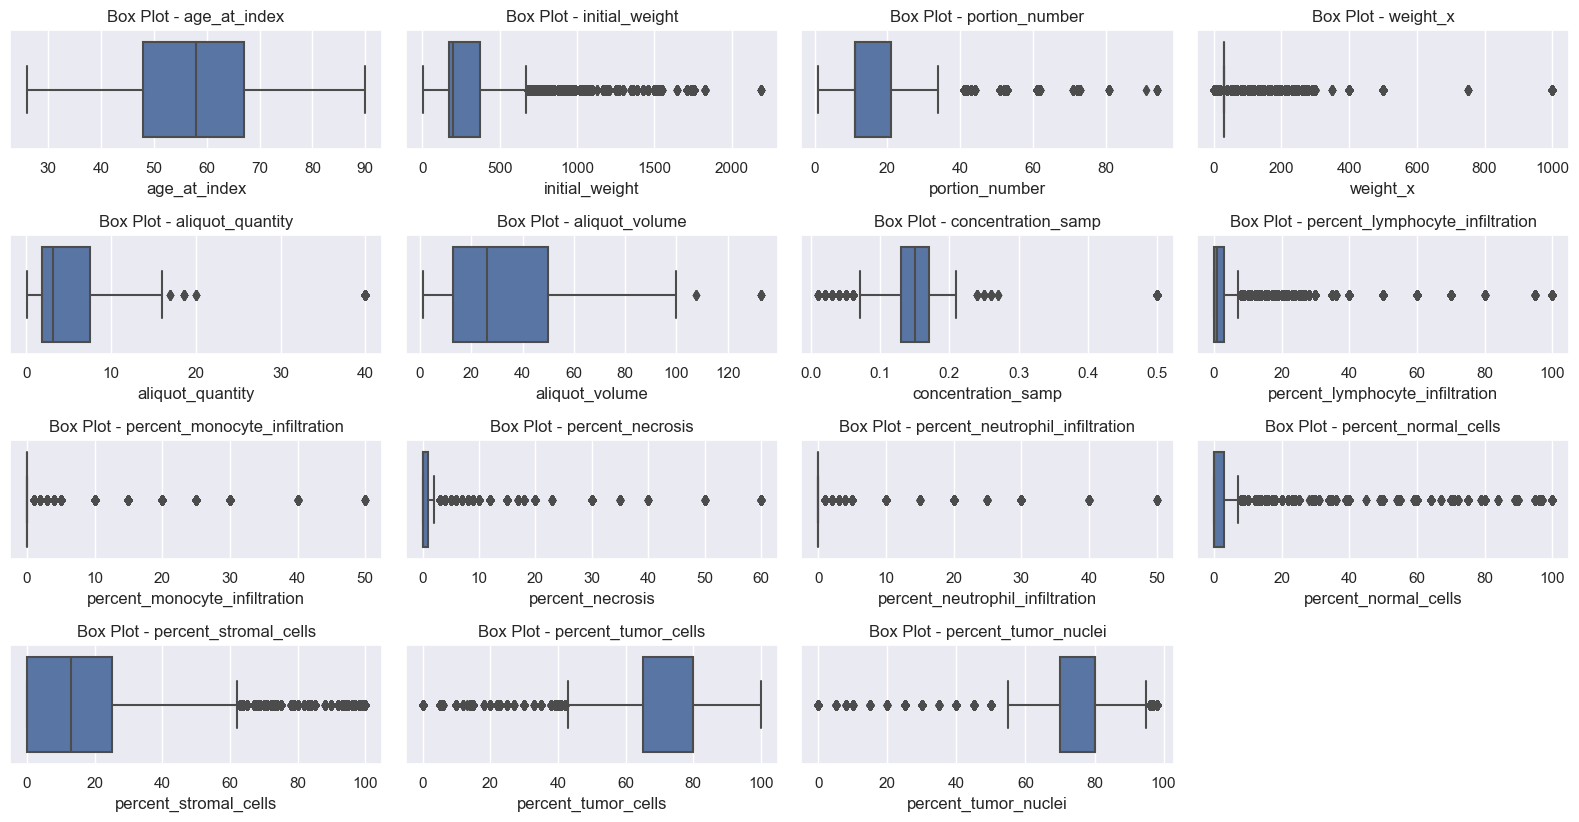

In [22]:
# Create box plots for each numerical column to visualize outliers
plt.figure(figsize=(16, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(6, 4, i)  # Create a grid of 6x4 for box plots
    sns.boxplot(x=cleaned_data[column])
    plt.title(f'Box Plot - {column}')
plt.tight_layout()
plt.show()  # Display the box plots for all numerical columns

> **Columns with Significant Outliers:**
> 1. Some columns show clear outliers, indicating data points that significantly deviate from the typical range.
> 2. Columns like initial_weight, portion_number, weight_x, percent_neutrophil_infiltration, aliquot_volume, days_to_collection, days_to_last_follow_up, and percent_tumor_cells seem to have substantial outliers.
>
> **Columns with Tight Distributions:**
> 1. Columns with fewer outliers indicate more consistent data or a narrower range of values.
> 2. Columns like year_of_birth, year_of_diagnosis, and age_at_index seem to have more consistent distributions.
>
> **Areas of Focus:**
> 1. Now focusing on columns with substantial outliers to determine whether they represent legitimate extreme cases, data entry errors, or measurement issues.
> 2. Further investigation into the context and relationships of these outliers determined that they should not be removed. We must retain them or adjust them.

> Removing any outliers from the numerical data

In [23]:
from scipy import stats

# Identify numerical columns to check for outliers
numerical_columns = cleaned_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Calculate the Z-scores for each numerical column
z_scores = cleaned_data[numerical_columns].apply(stats.zscore)

# Identify rows with Z-scores above a threshold (e.g., absolute value of 3)
outlier_threshold = 3  # Typically, Z-score > 3 indicates an outlier
outliers = cleaned_data[(z_scores.abs() > outlier_threshold).any(axis=1)]

# Display the count and first few rows of outliers found
outliers_count = outliers.shape[0]
outliers_count

outliers.head()  # Show a preview of the outliers found with Z-scores above the threshold

,age_at_index,ethnicity,gender,race,vital_status,ajcc_pathologic_m,ajcc_pathologic_n,ajcc_pathologic_stage,ajcc_pathologic_t,ajcc_staging_system_edition,...,aliquot_volume,concentration_samp,percent_lymphocyte_infiltration,percent_monocyte_infiltration,percent_necrosis,percent_neutrophil_infiltration,percent_normal_cells,percent_stromal_cells,percent_tumor_cells,percent_tumor_nuclei
2,60,not hispanic or latino,female,white,Alive,M0,N0 (mol+),Stage IA,T1c,7th,...,80.00,0.50,30.0,20.0,10.0,30.0,0.0,30.0,60.0,60.0
3,60,not hispanic or latino,female,white,Alive,M0,N0 (mol+),Stage IA,T1c,7th,...,26.70,0.16,30.0,20.0,10.0,30.0,0.0,30.0,60.0,60.0
4,60,not hispanic or latino,female,white,Alive,M0,N0 (mol+),Stage IA,T1c,7th,...,6.67,0.16,30.0,20.0,10.0,30.0,0.0,30.0,60.0,60.0
5,60,not hispanic or latino,female,white,Alive,M0,N0 (mol+),Stage IA,T1c,7th,...,53.40,0.08,30.0,20.0,10.0,30.0,0.0,30.0,60.0,60.0
6,60,not hispanic or latino,female,white,Alive,M0,N0 (mol+),Stage IA,T1c,7th,...,13.00,0.16,30.0,20.0,10.0,30.0,0.0,30.0,60.0,60.0


> Saving the cleaned data after the final step of Data Cleaning & Preprocessing.

In [24]:
cleaned_data.to_csv('../Results/cleaned_data.csv', index=False)

In [25]:
# Display unique counts for each column
unique_counts = cleaned_data.nunique()

# Create a summary of the unique counts and a sample of unique values for each column
unique_summary = {
    "Column": [],
    "Unique Count": [],
    "Sample Unique Values": []
}

# Set a threshold for displaying unique values
threshold = 10

for col in cleaned_data.columns:
    unique_summary["Column"].append(col)
    unique_summary["Unique Count"].append(unique_counts[col])

    if unique_counts[col] <= threshold:
        # Show all unique values for small counts
        unique_summary["Sample Unique Values"].append(cleaned_data[col].unique().tolist())
    else:
        # Show only the first few unique values for large counts
        unique_summary["Sample Unique Values"].append(cleaned_data[col].unique().tolist()[:threshold])

# Convert the summary to a DataFrame for easier viewing
unique_summary_data = pd.DataFrame(unique_summary)

# Display the summary
unique_summary_data

,Column,Unique Count,Sample Unique Values
0,age_at_index,65,"[60, 70, 50, 56, 61, 71, 76, 74, 59, 88]"
1,ethnicity,2,"[not hispanic or latino, hispanic or latino]"
2,gender,2,"[female, male]"
3,race,4,"[white, black or african american, american in..."
4,vital_status,2,"[Alive, Dead]"
5,ajcc_pathologic_m,4,"[M0, MX, M1, cM0 (i+)]"
6,ajcc_pathologic_n,16,"[N0 (mol+), N0, N1mi, N0 (i-), N1a, NX, N1b, N..."
7,ajcc_pathologic_stage,12,"[Stage IA, Stage I, Stage IIB, Stage IIA, Stag..."
8,ajcc_pathologic_t,13,"[T1c, T2, T3, T1b, T4, T1, TX, T4b, T1a, T4d]"
9,ajcc_staging_system_edition,5,"[7th, 6th, 4th, 3rd, 5th]"


In [26]:
# Create an empty list to store proportion summaries
proportion_summaries = []

# Iterate over columns to calculate proportions
for col in cleaned_data.columns:
    # Skip non-categorical columns
    if cleaned_data[col].dtype != 'object' and cleaned_data[col].dtype != 'category':
        continue
    
    # Calculate the proportion of each unique value
    proportions = cleaned_data[col].value_counts(normalize=True)

    # Create a DataFrame with proportions and round to 2 decimal places for readability
    proportion_df = proportions.reset_index()
    proportion_df.columns = [f"{col} Value", "Proportion"]
    proportion_df["Proportion"] = proportion_df["Proportion"].apply(lambda x: f"{x:.2%}")

    # Append to the list of proportion summaries
    proportion_summaries.append((col, proportion_df))

# Display proportion summaries in a structured manner
for col, prop_df in proportion_summaries:
    print(f"Proportions for column: {col}")
    print(prop_df)
    print("\n")

Proportions for column: ethnicity
          ethnicity Value Proportion
0  not hispanic or latino     97.70%
1      hispanic or latino      2.30%


Proportions for column: gender
  gender Value Proportion
0       female     99.06%
1         male      0.94%


Proportions for column: race
                         race Value Proportion
0                             white     82.59%
1         black or african american     11.79%
2                             asian      5.50%
3  american indian or alaska native      0.12%


Proportions for column: vital_status
  vital_status Value Proportion
0              Alive     85.29%
1               Dead     14.71%


Proportions for column: ajcc_pathologic_m
  ajcc_pathologic_m Value Proportion
0                      M0     87.84%
1                      MX      9.57%
2                      M1      2.25%
3                cM0 (i+)      0.34%


Proportions for column: ajcc_pathologic_n
   ajcc_pathologic_n Value Proportion
0                       N0     2

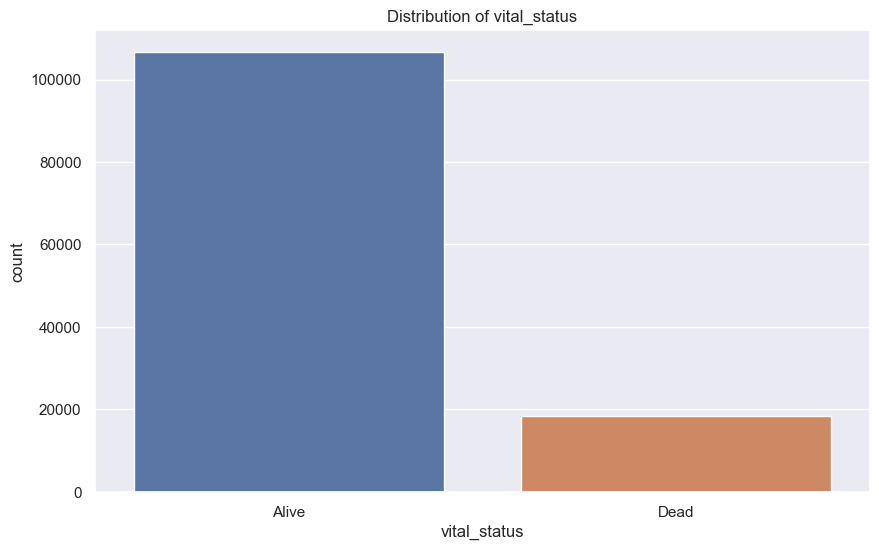

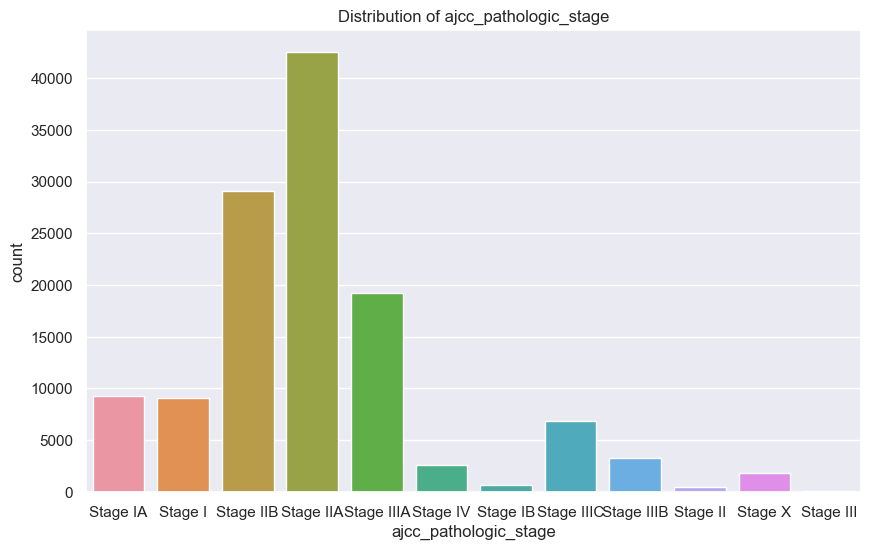

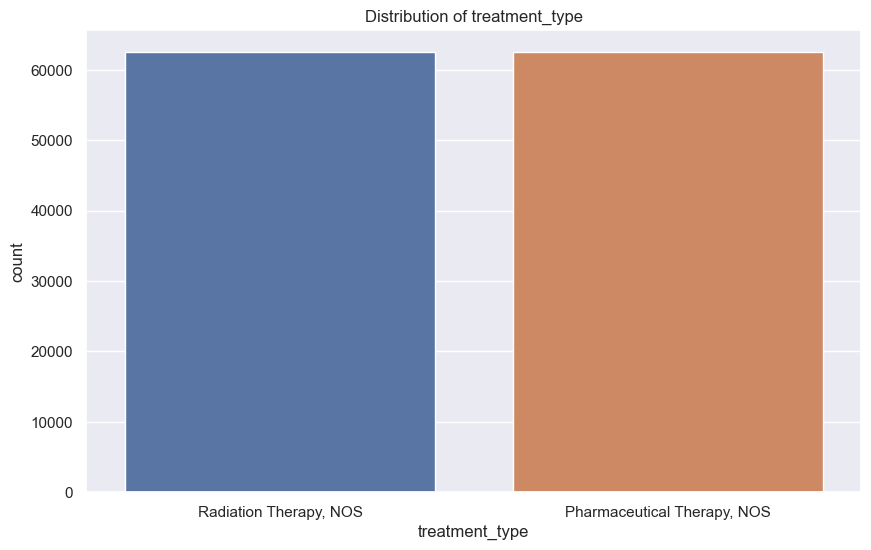

In [27]:
# Distribution of our target columns "ajcc_pathologic_stage", "vital_status", & "treatment_type"

for col in cleaned_data.columns:
    if col == "vital_status" or col == "ajcc_pathologic_stage" or col == "treatment_type":
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=cleaned_data)
        plt.title(f'Distribution of {col}')
        plt.show()

> Creating Pairwise scatter plots to examine relationships between numerical columns

<Figure size 1600x1200 with 0 Axes>

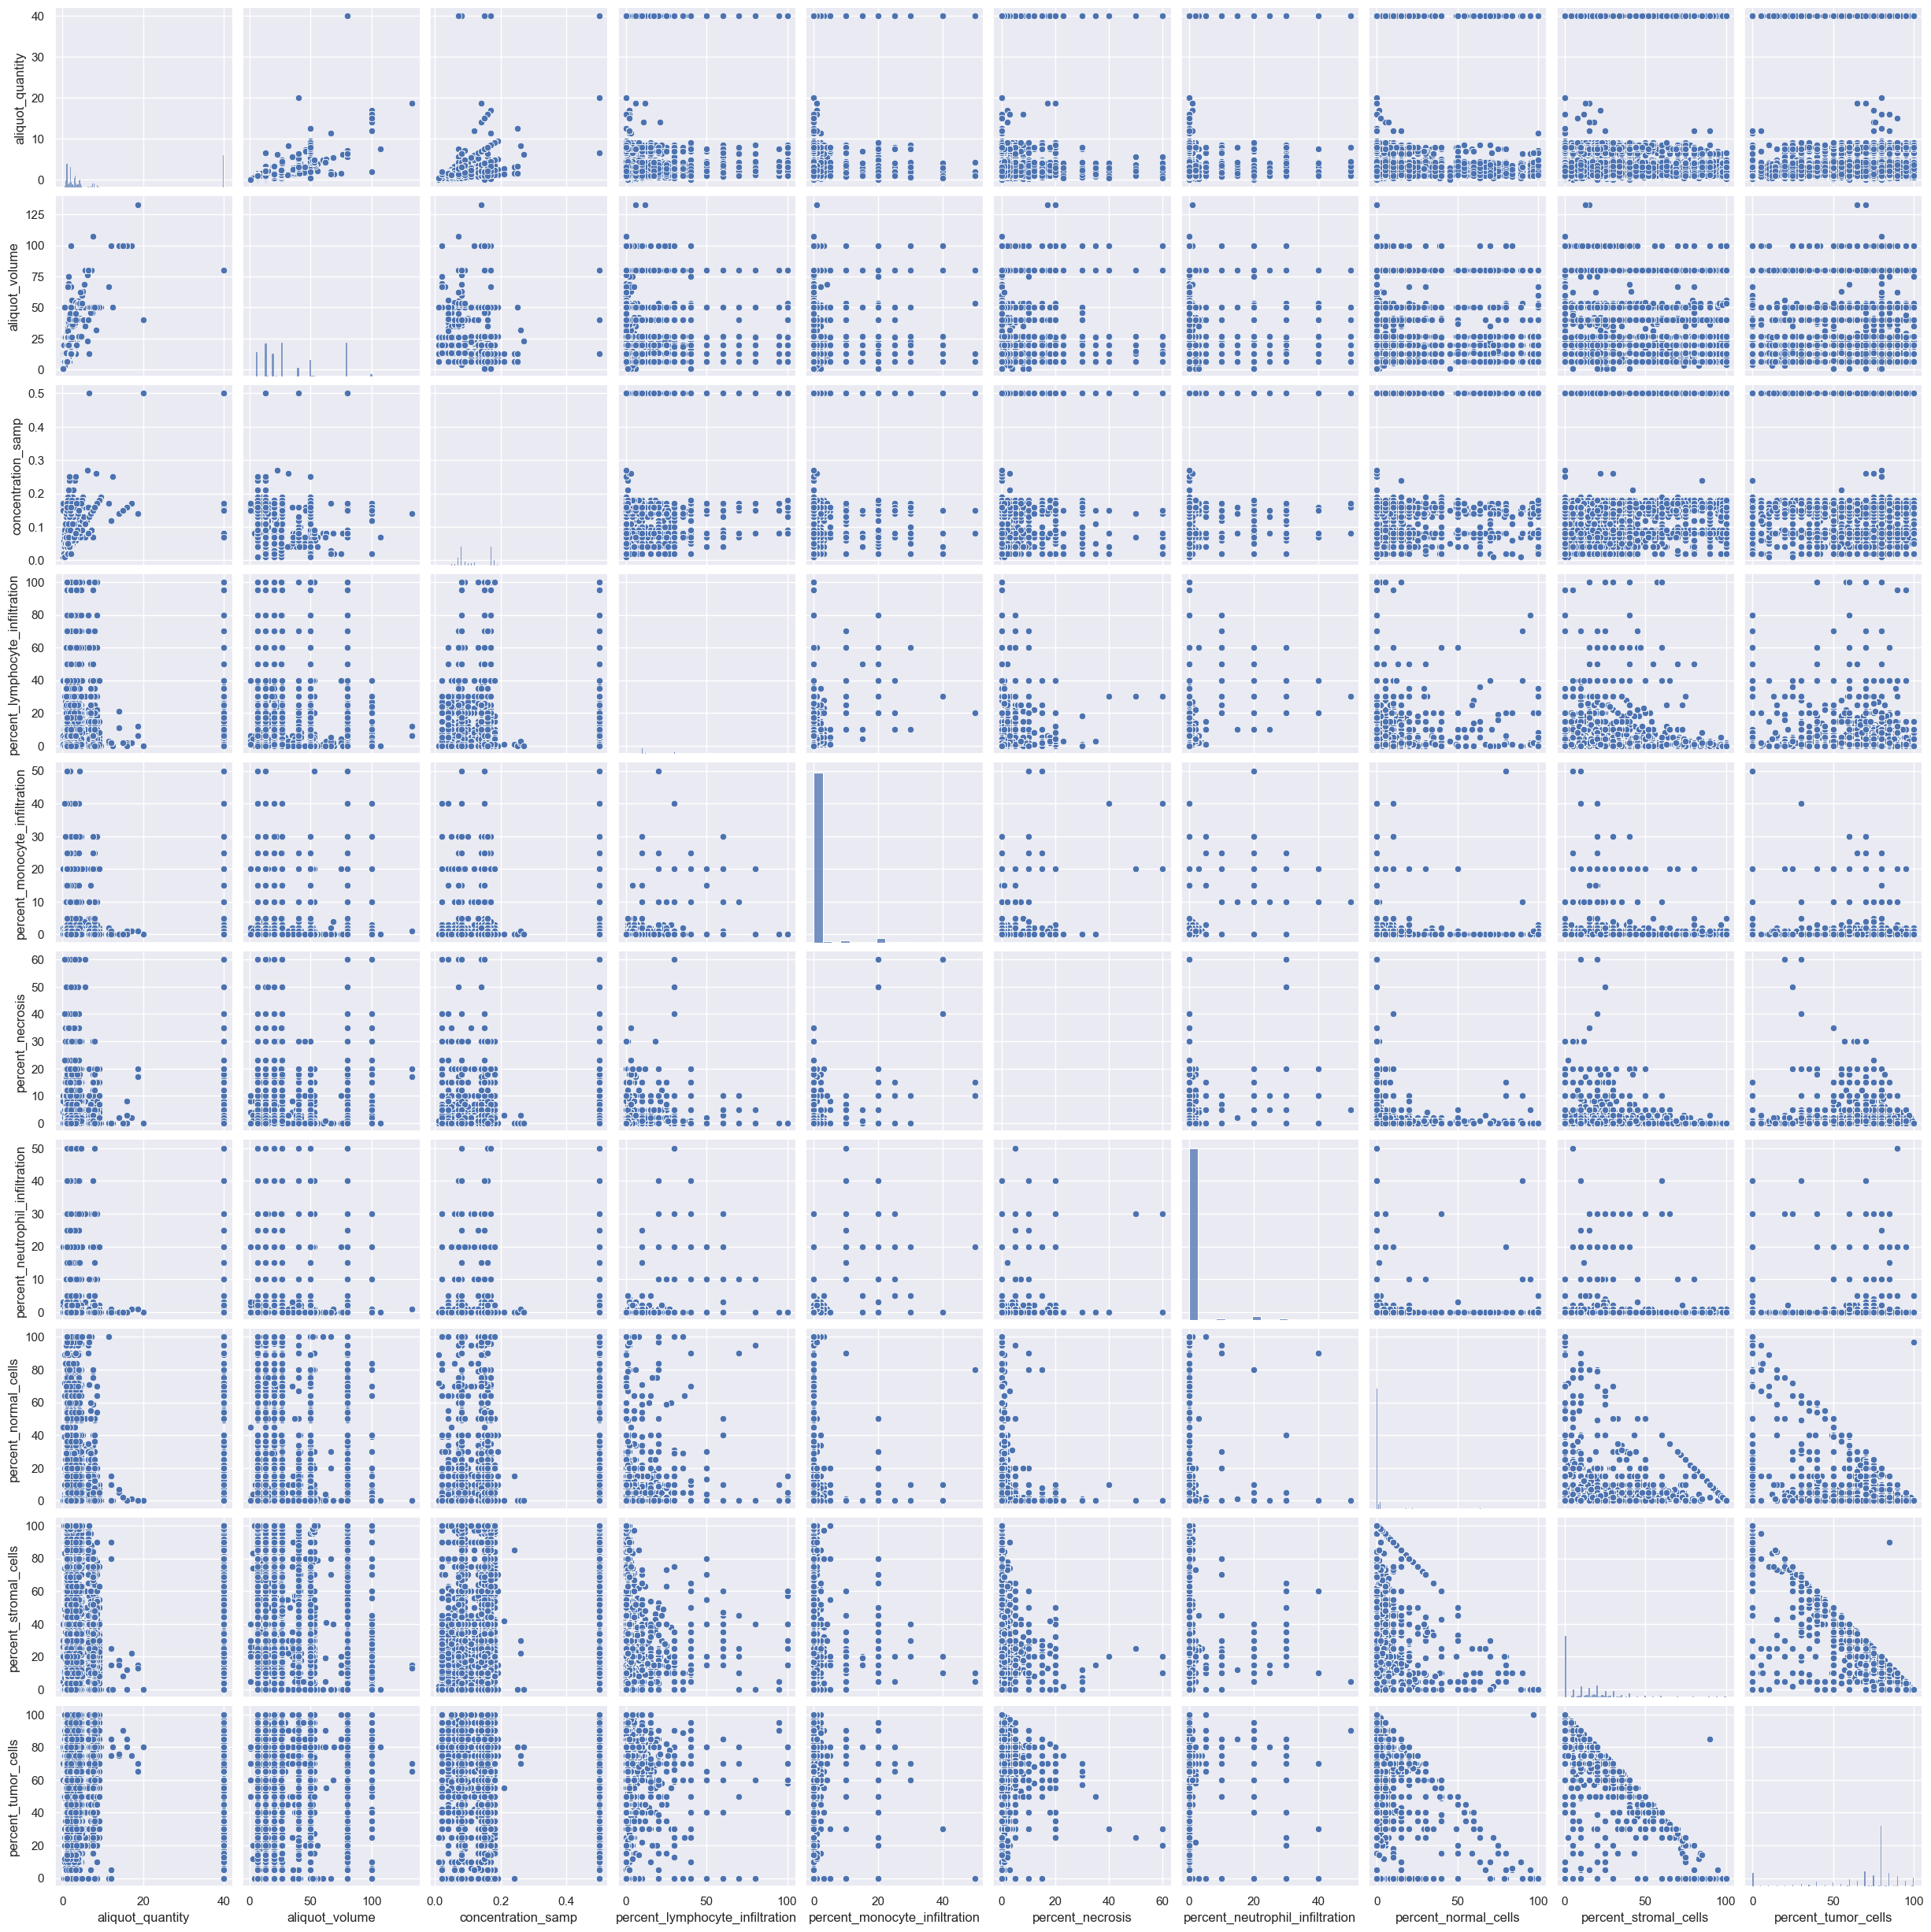

In [28]:
# Pairwise scatter plots can show correlations and relationships

plt.figure(figsize=(16, 12))
sns.pairplot(cleaned_data[numerical_columns[-11:-1]])  # Use a subset of numerical columns for a manageable plot
plt.show()  # Display the scatter plots to understand relationships between numerical columns

> Creating correlation heatmap for the last 10 columns of the cleaned data

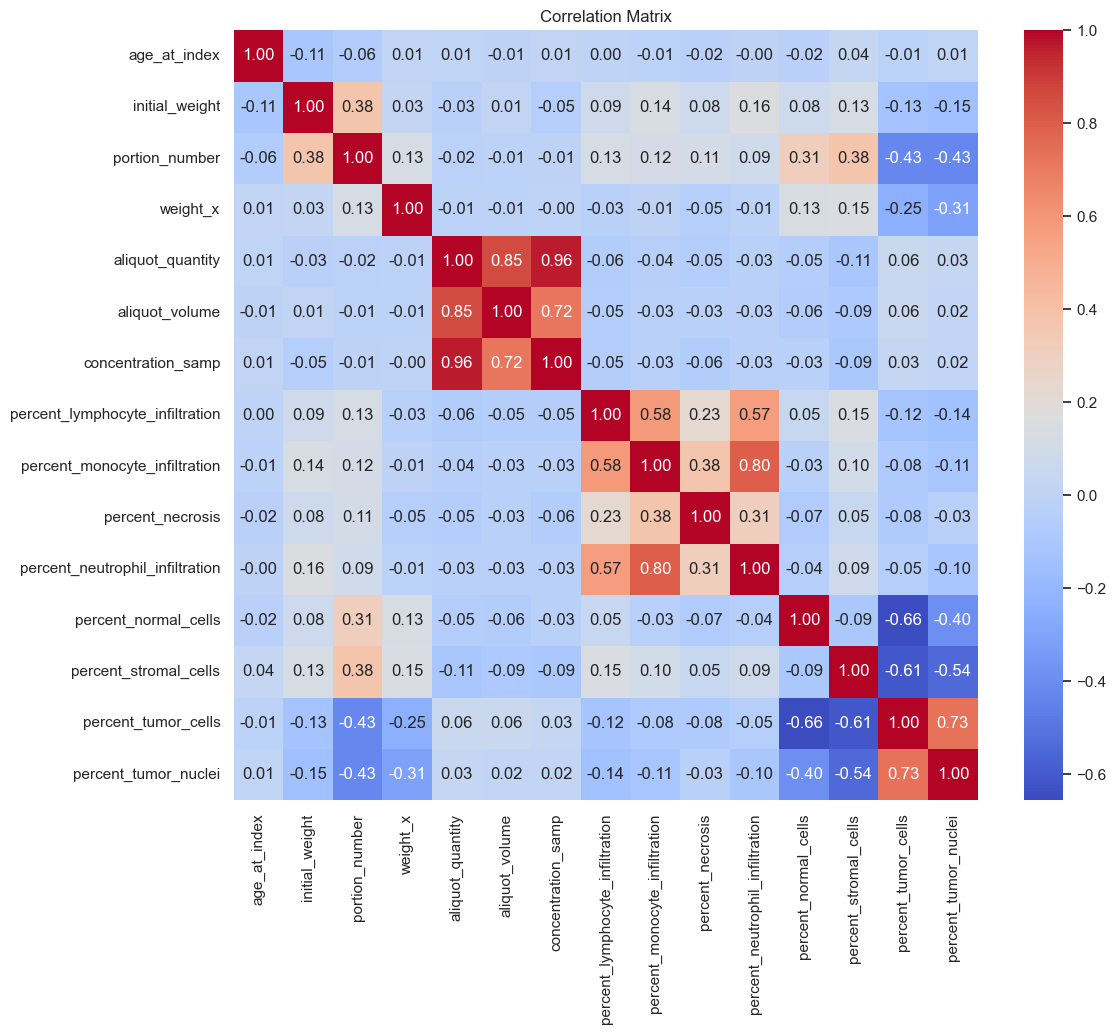

In [29]:
# Calculate the correlation matrix
correlation_matrix = cleaned_data[numerical_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

> Importing Bio library in python for checking any gene expression or DNA Sequence data 

In [30]:
from Bio import SeqIO
from Bio.Seq import Seq

# Load the CSV data
data = pd.read_csv('../Results/cleaned_data.csv')

data_sample = data.sample(frac=0.10, random_state=42)

data_sample.to_csv('../Results/cleaned_data_sample.csv', index=False)

print(data.head())  # Display the first few rows


   age_at_index               ethnicity  gender   race vital_status  \
0            60  not hispanic or latino  female  white        Alive   
1            60  not hispanic or latino  female  white        Alive   
2            60  not hispanic or latino  female  white        Alive   
3            60  not hispanic or latino  female  white        Alive   
4            60  not hispanic or latino  female  white        Alive   

  ajcc_pathologic_m ajcc_pathologic_n ajcc_pathologic_stage ajcc_pathologic_t  \
0                M0         N0 (mol+)              Stage IA               T1c   
1                M0         N0 (mol+)              Stage IA               T1c   
2                M0         N0 (mol+)              Stage IA               T1c   
3                M0         N0 (mol+)              Stage IA               T1c   
4                M0         N0 (mol+)              Stage IA               T1c   

  ajcc_staging_system_edition  ... aliquot_volume concentration_samp  \
0             

> Checking the data dor any DNA_Sequence or GC_Content

In [31]:
# Example: Assuming there's a column 'DNA_Sequence' in your CSV
# Convert DNA sequences to Biopython Seq objects and calculate basic properties
if 'DNA_Sequence' in data.columns:
    data['BioSeq'] = data['DNA_Sequence'].apply(Seq)
    data['GC_Content'] = data['BioSeq'].apply(lambda seq: SeqIO.GC(seq))

    print(data[['DNA_Sequence', 'GC_Content']].head())  # Print DNA sequence and GC content
else:
    print("No DNA_Sequence column found")

# Save any modifications or analyses
data.to_csv('../Results/analyzed_data.csv', index=False)

No DNA_Sequence column found


> Hence, our data has no BioInformatics encoded data, now we can proceed with normal Classification or Regression.

> **Data Encoding**

In [32]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

categorical_columns

['ethnicity',
 'gender',
 'race',
 'vital_status',
 'ajcc_pathologic_m',
 'ajcc_pathologic_n',
 'ajcc_pathologic_stage',
 'ajcc_pathologic_t',
 'ajcc_staging_system_edition',
 'icd_10_code',
 'morphology',
 'primary_diagnosis',
 'prior_malignancy',
 'prior_treatment',
 'site_of_resection_or_biopsy',
 'treatment_or_therapy',
 'treatment_type',
 'oct_embedded',
 'sample_type',
 'specimen_type',
 'tissue_type',
 'tumor_descriptor',
 'analyte_type_clin',
 'experimental_protocol_type']

> Applying Label Encoder

In [33]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
le = LabelEncoder()

# Apply label encoding to each categorical column
data['ajcc_pathologic_m'] = le.fit_transform(data['ajcc_pathologic_m'])
data['ajcc_pathologic_n'] = le.fit_transform(data['ajcc_pathologic_n'])
data['ajcc_pathologic_t'] = le.fit_transform(data['ajcc_pathologic_t'])
data['vital_status'] = le.fit_transform(data['vital_status'])
data['ajcc_staging_system_edition'] = le.fit_transform(data['ajcc_staging_system_edition'])
data['treatment_type'] = le.fit_transform(data['treatment_type'])
data['prior_treatment'] = le.fit_transform(data['prior_treatment'])
data['tumor_descriptor'] = le.fit_transform(data['tumor_descriptor'])

# Show the DataFrame with encoded columns
data.head()

,age_at_index,ethnicity,gender,race,vital_status,ajcc_pathologic_m,ajcc_pathologic_n,ajcc_pathologic_stage,ajcc_pathologic_t,ajcc_staging_system_edition,...,aliquot_volume,concentration_samp,percent_lymphocyte_infiltration,percent_monocyte_infiltration,percent_necrosis,percent_neutrophil_infiltration,percent_normal_cells,percent_stromal_cells,percent_tumor_cells,percent_tumor_nuclei
0,60,not hispanic or latino,female,white,0,0,3,Stage IA,3,4,...,80.00,0.50,0.0,0.0,0.0,0.0,0.0,0.0,80.0,80.0
1,60,not hispanic or latino,female,white,0,0,3,Stage IA,3,4,...,80.00,0.50,0.0,0.0,0.0,0.0,0.0,0.0,80.0,80.0
2,60,not hispanic or latino,female,white,0,0,3,Stage IA,3,4,...,80.00,0.50,30.0,20.0,10.0,30.0,0.0,30.0,60.0,60.0
3,60,not hispanic or latino,female,white,0,0,3,Stage IA,3,4,...,26.70,0.16,30.0,20.0,10.0,30.0,0.0,30.0,60.0,60.0
4,60,not hispanic or latino,female,white,0,0,3,Stage IA,3,4,...,6.67,0.16,30.0,20.0,10.0,30.0,0.0,30.0,60.0,60.0


> Applying Ordinal Encoder

In [34]:
from sklearn.preprocessing import OrdinalEncoder

# Create an OrdinalEncoder instance with specified order for each column
# The 'categories' parameter is a list of lists where each inner list contains the ordered categories
ordinal_encoder = OrdinalEncoder(categories=[
    ['Stage 0', 'Stage I', 'Stage IA', 'Stage IB', 'Stage II', 'Stage IIA', 'Stage IIB', 'Stage III', 'Stage IIIA',
              'Stage IIIB', 'Stage IIIC', 'Stage IV', 'Stage X'] # Order for AJCC Pathologic Stage
])  

# Apply ordinal encoding to the DataFrame
encoded_data = data.copy()  # Create a copy to avoid modifying the original DataFrame
encoded_data[['ajcc_pathologic_stage']] = ordinal_encoder.fit_transform(data[['ajcc_pathologic_stage']])

# Show the encoded DataFrame
encoded_data.head()

,age_at_index,ethnicity,gender,race,vital_status,ajcc_pathologic_m,ajcc_pathologic_n,ajcc_pathologic_stage,ajcc_pathologic_t,ajcc_staging_system_edition,...,aliquot_volume,concentration_samp,percent_lymphocyte_infiltration,percent_monocyte_infiltration,percent_necrosis,percent_neutrophil_infiltration,percent_normal_cells,percent_stromal_cells,percent_tumor_cells,percent_tumor_nuclei
0,60,not hispanic or latino,female,white,0,0,3,2.0,3,4,...,80.00,0.50,0.0,0.0,0.0,0.0,0.0,0.0,80.0,80.0
1,60,not hispanic or latino,female,white,0,0,3,2.0,3,4,...,80.00,0.50,0.0,0.0,0.0,0.0,0.0,0.0,80.0,80.0
2,60,not hispanic or latino,female,white,0,0,3,2.0,3,4,...,80.00,0.50,30.0,20.0,10.0,30.0,0.0,30.0,60.0,60.0
3,60,not hispanic or latino,female,white,0,0,3,2.0,3,4,...,26.70,0.16,30.0,20.0,10.0,30.0,0.0,30.0,60.0,60.0
4,60,not hispanic or latino,female,white,0,0,3,2.0,3,4,...,6.67,0.16,30.0,20.0,10.0,30.0,0.0,30.0,60.0,60.0


> Applying One-Hot Encoding

In [35]:
# Apply one-hot encoding using get_dummies() on selected columns
encoded_data = pd.get_dummies(encoded_data, columns=['ethnicity', 'gender', 'race', 'icd_10_code', 'morphology', 'primary_diagnosis', 'site_of_resection_or_biopsy',
                                                    'treatment_or_therapy', 'sample_type', 'oct_embedded', 'prior_malignancy', 'specimen_type', 'tissue_type', 
                                                     'analyte_type_clin', 'experimental_protocol_type'])

# Display the DataFrame with one-hot encoded columns
print(encoded_data)

        age_at_index  vital_status  ajcc_pathologic_m  ajcc_pathologic_n  \
0                 60             0                  0                  3   
1                 60             0                  0                  3   
2                 60             0                  0                  3   
3                 60             0                  0                  3   
4                 60             0                  0                  3   
...              ...           ...                ...                ...   
125065            58             0                  0                  4   
125066            58             0                  0                  4   
125067            58             0                  0                  4   
125068            58             0                  0                  4   
125069            58             0                  0                  4   

        ajcc_pathologic_stage  ajcc_pathologic_t  ajcc_staging_system_edition  \
0     

In [36]:
encoded_data.to_csv('../Results/encoded_data.csv')

encoded_data_sample = encoded_data.sample(frac=0.10, random_state=42)

encoded_data_sample.to_csv('../Results/encoded_data_sample.csv', index=False)

> **Splitting the data**

In [37]:
encoded_data = pd.read_csv('../Results/encoded_data.csv')

In [38]:
from sklearn.model_selection import train_test_split

# Target columns to be predicted
target_columns = ["vital_status", "ajcc_pathologic_stage", "treatment_type"]

# Features are the columns other than the target columns
X = encoded_data.drop(columns=target_columns)

# Targets are the specific columns to be predicted
y = encoded_data[target_columns]

# Split into training and test sets with an 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing subsets to confirm the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape  # Output the shapes of the subsets

((100056, 117), (25014, 117), (100056, 3), (25014, 3))

> **Model Development**

In [39]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

> Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

# Initialize MultiOutputClassifier with Naive Bayes (GaussianNB) as the base estimator
multioutput_nb = MultiOutputClassifier(GaussianNB())

# Train the model with the training data
multioutput_nb.fit(X_train, y_train)

# Perform predictions on the test set
y_pred_nb = multioutput_nb.predict(X_test)

# ROC AUC calculation requires probabilities, so use predict_proba for that
y_proba_nb = multioutput_nb.predict_proba(X_test)

# Calculate accuracy for each output variable
accuracy_nb_vital_status = accuracy_score(y_test["vital_status"], y_pred_nb[:, 0])
accuracy_nb_ajcc_stage = accuracy_score(y_test["ajcc_pathologic_stage"], y_pred_nb[:, 1])
accuracy_nb_prior_malignancy = accuracy_score(y_test["treatment_type"], y_pred_nb[:, 2])

# Overall accuracy as an average of all three outputs
overall_accuracy_nb = (accuracy_nb_vital_status + accuracy_nb_ajcc_stage + accuracy_nb_prior_malignancy) / 3

# Return the accuracy results and the first few predictions
print(f"Accuracy of Naive Bayes Classifier - {overall_accuracy_nb}")

Accuracy of Naive Bayes Classifier - 0.570693744836225


In [41]:
# Correctly reshape the binarized array and ensure its dimensions align with the DataFrame index
# Extract only the second class for binary ROC AUC
y_test_nb = y_test.copy()
ajcc_unique_classes = sorted(y_test_nb['ajcc_pathologic_stage'].unique())

y_test_nb['ajcc_pathologic_stage_bin'] = label_binarize(y_test_nb['ajcc_pathologic_stage'], classes=ajcc_unique_classes)[:, 1]

# Calculate ROC AUC for each output variable after binarization
roc_auc_nb_vital_status = roc_auc_score(y_test_nb["vital_status"], y_proba_nb[0][:, 1])

roc_auc_nb_ajcc_stage = roc_auc_score(y_test_nb['ajcc_pathologic_stage_bin'], y_proba_nb[1][:, 1])

roc_auc_nb_prior_malignancy = roc_auc_score(y_test_nb["treatment_type"], y_proba_nb[2][:, 1])

# Overall ROC AUC as an average of all three outputs
overall_roc_auc_nb = (roc_auc_nb_vital_status + roc_auc_nb_ajcc_stage + roc_auc_nb_prior_malignancy) / 3

print(f"ROC AUC of Naive Bayes Classifier - {overall_roc_auc_nb}")  # Return the Overall ROC AUC score

ROC AUC of Naive Bayes Classifier - 0.7152851551167837


> Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

# Initialize MultiOutputClassifier with LogisticRegression as the base estimator
multioutput_log_reg = MultiOutputClassifier(LogisticRegression(random_state=42, max_iter=1000))

# Train the model with the training data
multioutput_log_reg.fit(X_train, y_train)

# Perform predictions on the test set
y_pred_log_reg = multioutput_log_reg.predict(X_test)

# ROC AUC calculation requires probabilities, so use predict_proba for that
y_proba_log_reg = multioutput_log_reg.predict_proba(X_test)

# Calculate accuracy for each output variable
accuracy_log_reg_vital_status = accuracy_score(y_test["vital_status"], y_pred_log_reg[:, 0])
accuracy_log_reg_ajcc_stage = accuracy_score(y_test["ajcc_pathologic_stage"], y_pred_log_reg[:, 1])
accuracy_log_reg_prior_malignancy = accuracy_score(y_test["treatment_type"], y_pred_log_reg[:, 2])

# Overall accuracy as an average of all three outputs
overall_accuracy_log_reg = (accuracy_log_reg_vital_status + accuracy_log_reg_ajcc_stage + accuracy_log_reg_prior_malignancy) / 3

# Return the accuracy results and the first few predictions
print(f"Accuracy of Logistic Regression - {overall_accuracy_log_reg}")

Accuracy of Logistic Regression - 0.6080728125583007


In [43]:
# Correctly reshape the binarized array and ensure its dimensions align with the DataFrame index
# Extract only the second class for binary ROC AUC
y_test_log_reg = y_test.copy()
ajcc_unique_classes = sorted(y_test_log_reg['ajcc_pathologic_stage'].unique())

y_test_log_reg['ajcc_pathologic_stage_bin'] = label_binarize(y_test_log_reg['ajcc_pathologic_stage'], classes=ajcc_unique_classes)[:, 1]

# Calculate ROC AUC for each output variable after binarization
roc_auc_log_reg_vital_status = roc_auc_score(y_test_log_reg["vital_status"], y_proba_log_reg[0][:, 1])

roc_auc_log_reg_ajcc_stage = roc_auc_score(y_test_log_reg['ajcc_pathologic_stage_bin'], y_proba_log_reg[1][:, 1])

roc_auc_log_reg_prior_malignancy = roc_auc_score(y_test_log_reg["treatment_type"], y_proba_log_reg[2][:, 1])

# Overall ROC AUC as an average of all three outputs
overall_roc_auc_log_reg = (roc_auc_log_reg_vital_status + roc_auc_log_reg_ajcc_stage + roc_auc_log_reg_prior_malignancy) / 3

print(f"ROC AUC of Logistic Regression - {overall_roc_auc_log_reg}")  # Return the Overall ROC AUC score

ROC AUC of Logistic Regression - 0.6660600709711851


> Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Initialize MultiOutputClassifier with Random Forest as the base estimator
multioutput_rf = MultiOutputClassifier(RandomForestClassifier(random_state=42, n_estimators=100))

# Train the model with the training data
multioutput_rf.fit(X_train, y_train)

# Perform predictions on the test set for accuracy (use predict)
y_pred_rf = multioutput_rf.predict(X_test)

# ROC AUC calculation requires probabilities, so use predict_proba for that
y_proba_rf = multioutput_rf.predict_proba(X_test)

# Calculate accuracy for each output variable
accuracy_rf_vital_status = accuracy_score(y_test["vital_status"], y_pred_rf[:, 0])
accuracy_rf_ajcc_stage = accuracy_score(y_test["ajcc_pathologic_stage"], y_pred_rf[:, 1])
accuracy_rf_prior_malignancy = accuracy_score(y_test["treatment_type"], y_pred_rf[:, 2])

# Overall accuracy as an average of all three outputs
overall_accuracy_rf = (accuracy_rf_vital_status + accuracy_rf_ajcc_stage + accuracy_rf_prior_malignancy) / 3

# Return the accuracy results
print(f"Accuracy of Random Forest Classifier - {overall_accuracy_rf}")

Accuracy of Random Forest Classifier - 0.9354761333653153


In [45]:
# Correctly reshape the binarized array and ensure its dimensions align with the DataFrame index
# Extract only the second class for binary ROC AUC
y_test_rf = y_test.copy()
y_test_rf['ajcc_pathologic_stage_bin'] = label_binarize(y_test_rf['ajcc_pathologic_stage'], classes=ajcc_unique_classes)[:, 1]

# Calculate ROC AUC for each output variable after binarization
roc_auc_rf_vital_status = roc_auc_score(y_test_rf["vital_status"], y_proba_rf[0][:, 1])

roc_auc_rf_ajcc_stage = roc_auc_score(y_test_rf['ajcc_pathologic_stage_bin'], y_proba_rf[1][:, 1])

roc_auc_rf_prior_malignancy = roc_auc_score(y_test_rf["treatment_type"], y_proba_rf[2][:, 1])

# Overall ROC AUC as an average of all three outputs
overall_roc_auc_rf = (roc_auc_rf_vital_status + roc_auc_rf_ajcc_stage + roc_auc_rf_prior_malignancy) / 3

print(f"ROC AUC of Random Forest Classifier - {overall_roc_auc_rf}")  # Return the Overall ROC AUC score

ROC AUC of Random Forest Classifier - 0.9635574382850033


> Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

# Initialize MultiOutputClassifier with Decision Tree as the base estimator
multioutput_dt = MultiOutputClassifier(DecisionTreeClassifier(random_state=42))

# Train the model with the training data
multioutput_dt.fit(X_train, y_train)

# Perform predictions on the test set for accuracy (use predict)
y_pred_dt = multioutput_dt.predict(X_test)

# Calculate accuracy for each output variable
accuracy_dt_vital_status = accuracy_score(y_test["vital_status"], y_pred_dt[:, 0])
accuracy_dt_ajcc_stage = accuracy_score(y_test["ajcc_pathologic_stage"], y_pred_dt[:, 1])
accuracy_dt_prior_malignancy = accuracy_score(y_test["treatment_type"], y_pred_dt[:, 2])

# Overall accuracy as an average of all three outputs
overall_accuracy_dt = (accuracy_dt_vital_status + accuracy_dt_ajcc_stage + accuracy_dt_prior_malignancy) / 3

# Return the accuracy results
print(f"Accuracy of Decision Tree Classifier - {overall_accuracy_dt}")

Accuracy of Decision Tree Classifier - 0.9974414327976334


In [47]:
# Obtain probabilities using predict_proba (used for ROC AUC calculation)
y_proba_dt = [dt.predict_proba(X_test) for dt in multioutput_dt.estimators_]
y_test_dt = y_test.copy()
y_test_dt['ajcc_pathologic_stage_bin'] = label_binarize(y_test_dt['ajcc_pathologic_stage'], classes=ajcc_unique_classes)[:, 1]

# Calculate ROC AUC for each output variable
roc_auc_dt_vital_status = roc_auc_score(y_test["vital_status"], y_proba_dt[0][:, 1], multi_class='ovr')
roc_auc_dt_ajcc_stage = roc_auc_score(y_test_dt["ajcc_pathologic_stage_bin"], y_proba_dt[1][:, 1], multi_class='ovr')
roc_auc_dt_prior_malignancy = roc_auc_score(y_test["treatment_type"], y_proba_dt[2][:, 1], multi_class='ovr')

# Overall ROC AUC as an average of all three outputs
overall_roc_auc_dt = (roc_auc_dt_vital_status + roc_auc_dt_ajcc_stage + roc_auc_dt_prior_malignancy) / 3

# Return the ROC AUC results
print(f"Overall ROC AUC of Decision Tree Classifier - {overall_roc_auc_dt}")

Overall ROC AUC of Decision Tree Classifier - 0.9973876204605195


In [48]:
# Example data for demonstration purposes
accuracy_roc_values = {
    "Model": ["Naive Bayes", "Logistic Regression", "Random Forest", "Decision Tree"],
    "Accuracy": [overall_accuracy_nb, overall_accuracy_log_reg, overall_accuracy_rf, overall_accuracy_dt],  # Overall accuracy as the average,
    "ROC AUC": [overall_roc_auc_nb, overall_roc_auc_log_reg, overall_roc_auc_rf, overall_roc_auc_dt] # Overall ROC AUC as the average
}

# Create dataframes from the dictionaries
combined_data = pd.DataFrame(accuracy_roc_values)

combined_data

,Model,Accuracy,ROC AUC
0,Naive Bayes,0.570694,0.715285
1,Logistic Regression,0.608073,0.666060
2,Random Forest,0.935476,0.963557
3,Decision Tree,0.997441,0.997388


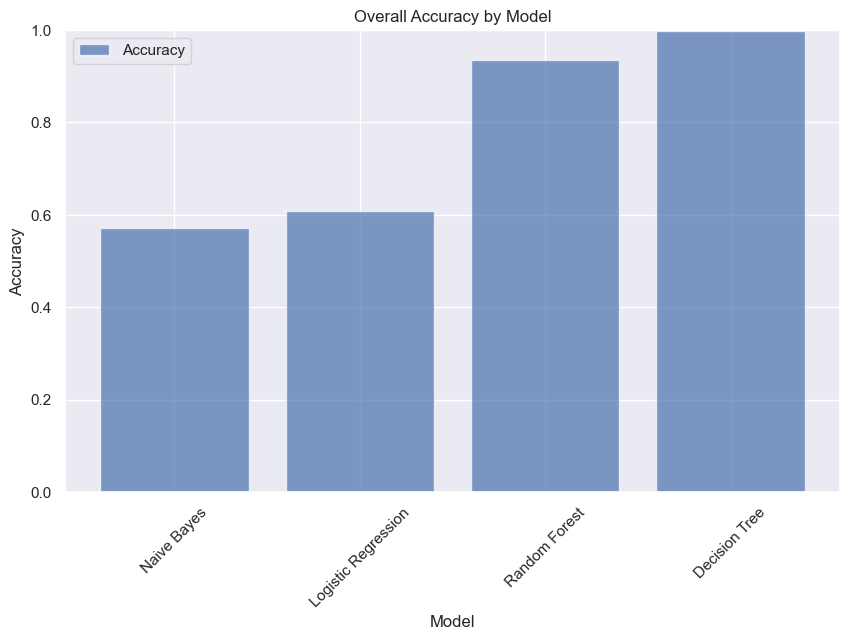

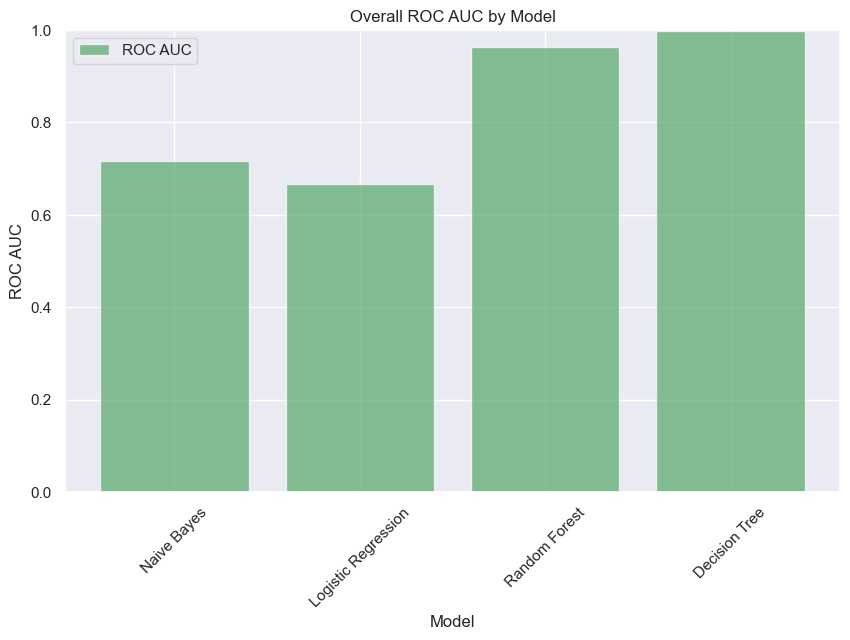

In [49]:
# Creating a bar plot for accuracy
plt.figure(figsize=(10, 6))
plt.bar(combined_data["Model"], combined_data["Accuracy"], color='b', alpha=0.7, label="Accuracy")
plt.title("Overall Accuracy by Model")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Creating a bar plot for ROC AUC
plt.figure(figsize=(10, 6))
plt.bar(combined_data["Model"], combined_data["ROC AUC"], color='g', alpha=0.7, label="ROC AUC")
plt.title("Overall ROC AUC by Model")
plt.xlabel("Model")
plt.ylabel("ROC AUC")
plt.ylim(0, 1)  # ROC AUC is also between 0 and 1
plt.xticks(rotation=45)
plt.legend()
plt.show()  # Display the plots again

> **Selected Model - Decision Tree**

In [50]:
y_test.to_csv("../Results/test_data.csv")

y_pred_data = pd.DataFrame(y_pred_dt, columns=["vital_status", "ajcc_pathologic_stage", "treatment_type"])

y_pred_data.to_csv("../Results/predicted_data.csv")

In [51]:
# Calculate error for each output variable (1 - accuracy)
error_dt_vital_status = 1 - accuracy_dt_vital_status
error_dt_ajcc_stage = 1 - accuracy_dt_ajcc_stage
error_dt_prior_malignancy = 1 - accuracy_dt_prior_malignancy

# Overall error as an average of all three outputs
overall_error_dt = (error_dt_vital_status + error_dt_ajcc_stage + error_dt_prior_malignancy) / 3

# Return the error results
print(f"Error of Decision Tree Classifier - {overall_error_dt}")

Error of Decision Tree Classifier - 0.0025585672023666537


> For the target column - "Vital Status"

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report for "vital_status"
class_report_vital_status = classification_report(y_test["vital_status"], y_pred_dt[:, 0])
print("Classification Report - Vital Status:\n", class_report_vital_status)

Classification Report - Vital Status:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21386
           1       1.00      1.00      1.00      3628

    accuracy                           1.00     25014
   macro avg       1.00      1.00      1.00     25014
weighted avg       1.00      1.00      1.00     25014



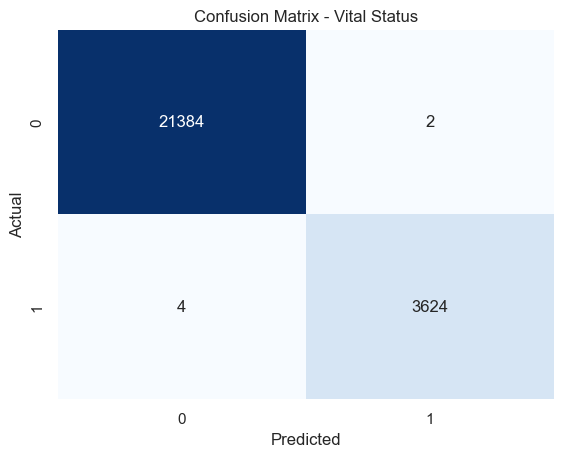

In [53]:
# Confusion matrix for "vital_status"
conf_matrix_vital_status = confusion_matrix(y_test["vital_status"], y_pred_dt[:, 0])
sns.heatmap(conf_matrix_vital_status, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Vital Status")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

> For the target column - "Ajcc Pathologic Stage"

In [54]:
# Classification report for "ajcc_pathologic_stage"
class_report_ajcc_pathologic_stage = classification_report(y_test["ajcc_pathologic_stage"], y_pred_dt[:, 1])
print("Classification Report - Ajcc Pathologic Stage:\n", class_report_ajcc_pathologic_stage)

Classification Report - Ajcc Pathologic Stage:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1834
         2.0       1.00      1.00      1.00      1860
         3.0       1.00      1.00      1.00       146
         4.0       1.00      1.00      1.00        96
         5.0       1.00      1.00      1.00      8515
         6.0       1.00      1.00      1.00      5873
         7.0       1.00      0.81      0.89        21
         8.0       1.00      1.00      1.00      3792
         9.0       1.00      1.00      1.00       705
        10.0       1.00      1.00      1.00      1324
        11.0       1.00      1.00      1.00       494
        12.0       1.00      1.00      1.00       354

    accuracy                           1.00     25014
   macro avg       1.00      0.98      0.99     25014
weighted avg       1.00      1.00      1.00     25014



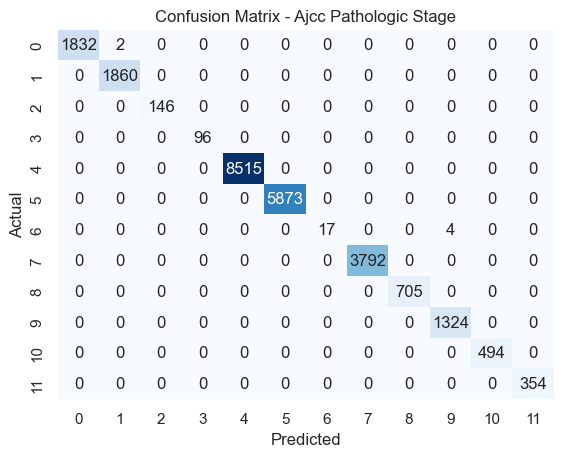

In [55]:
# Confusion matrix for "ajcc_pathologic_stage"
conf_matrix_ajcc_pathologic_stage = confusion_matrix(y_test["ajcc_pathologic_stage"], y_pred_dt[:, 1])
sns.heatmap(conf_matrix_ajcc_pathologic_stage, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Ajcc Pathologic Stage")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

> For the target column - "Treatment Type"

In [56]:
# Classification report for "treatment_type"
class_report_treatment_type = classification_report(y_test["treatment_type"], y_pred_dt[:, 2])
print("Classification Report - Treatment Type:\n", class_report_treatment_type)

Classification Report - Treatment Type:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     12499
           1       0.99      0.99      0.99     12515

    accuracy                           0.99     25014
   macro avg       0.99      0.99      0.99     25014
weighted avg       0.99      0.99      0.99     25014



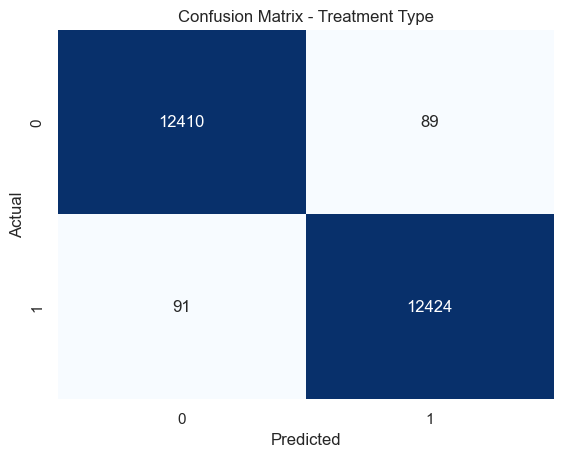

In [57]:
# Confusion matrix for "treatment_type"
conf_matrix_treatment_type = confusion_matrix(y_test["treatment_type"], y_pred_dt[:, 2])
sns.heatmap(conf_matrix_treatment_type, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Treatment Type")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()